## Repaso:
Pretendemos resolver el problema $Ax =b$ (uno de los problemas mas importantes del algebra lineal). Si $A$ es no singular (invertible) entonces $x  = A^{-1} b$ y "pare de contar".

En general $A$ ni es cuadrada. Existen dos problemas:

1. Si a es **sobredeterminada** y el sistema $Ax=b$ tiene mas ecuaciones indendientes que incogintas. El espacio nulo es $\{0\}$ pero el rango no cubre el espacio $\mathbb{C}^n$. 
2. Si a es **subdeterminada** hay mas incognitas que ecuaciones linelamente independientes, el espacio nulo no es $\{0\}$, el rango de $A$ no cubre todo el espacio y hay un numero infinito de soluciones.

Que hacer cuando $Ax=b$ es tal que $A$ ni siquiera es cuadrada.

Que pudo haber pensado Tikhonov?  Que tal si multiplicamos a ambos lados por $A^*$.

$$ A^* A x = A^* b $$
estas son las ecuaciones normales que salen de minimizar 
$f(x) = \| A x - b \|^2$. $A^* A$ es una matriz cuadrada.
Sabemos que (mire la tarea que usted entrego) pueden haber 
autovalores de $A^*A$ de valor 0. Esto implica que no existe la
inversa de $A^*A$. Yo digo (que Tikhonov) penso que se debe correr el espectro al lado positivo. En vez de $A^*A$ por que no usar
$A^*A + \lambda I$ y resolver el problema:


$$(A^*A + \lambda I) x = A^* b $$.
Como (ver la tarea) $A^*A + \lambda I$ es positiva definida (en la definicion de nosotros) (la definicion nuestra de positiva definida es que **todos** los autovalores son positivos, pero esto es equivalente a que para $\forall x \ne 0$, $x^T A x > 0$.  Toda matriz positiva definida es invertible y entonces

$$ x = (A^*A + \lambda I)^{-1} (A^* b)  $$

A este problema se le conoce con muchos nombres:

1. Tikhonov regularizacion
2. Weight decay (en ML)
3. Tikhonov-Miller method
4. Phillips-Twomey method
5. Ridge Regression. (en estadistica). Cando $\Gamma=\sqrt{\lambda}I$. 

Otra forma como Tikhonov pudo haber pensado en este problema es a travez de optimizacion, funciones objetivo, minimizacion, etc.

El problema de **minimos cuadrados** es la minimizacion de la funcion convexa.

$$ f(x) = \| Ax - b \|^2$$. Este problema da lugar (lo vimos en clase)
a las ecuacion normales. Si, $\nabla f(x) =0$ , entonces $A^* A x = A^* b$. 

Ahora bien, que pasa si $\mathcal{N}(A^* A) \ne \{0\}$. Hay un numero infinito de soluciones (subdeterminado), entonces para garantizar una sola solucion, Tikhonov dijo, agreguemos una funcion penalti.

$$ f(x) = \| Ax - b \|^2 + \| \Gamma x \|^2  $$
esto da lugar a las ecuaciones normales **regularizadas**

$$ (A^*A + \Gamma^* \Gamma) x = A^* b$$
y como $\Gamma$ es positiva definida entonces se puede probar (lo mismo de la tarea para hoy) que $A^* A + \Gamma^* \Gamma$ es posiva definida y
tiene inverso. La solucion es entonces:

$$ x = (A^* A + \Gamma^* \Gamma)^{-1} A^* b. $$

Ejercicios (ejemplos): Vamos a ver una funcion caudratica, como se halla minimo a travez de completacion de cuadrados. 

Definimos la siguiente funcion cuadratica, sobre $\mathbb{R}$. 

$$ f(x) = \frac12 x^* A^* A x - (A^* b)^* x + c $$.
Como hallar el minimo sin usar calculo.

$$ f(x) = \frac12 (A x)^* (Ax) - b^* (A x)  + c  $$
hagamos cambio de variables $y= Ax$  y obtenemos:

$$ f(y) = \frac12 ( y^* y  - 2 b^* y )  + c $$
Completacion de cuadrados. Sumamos la mitad del coeficiente 

$$ f(y) = \frac12 ( y^* y  - 2 b^* y + b^* b )  + c  - \frac12 b^* b$$

Esto es:

Observe que $(y-b)^* (y-b) = \| y -b \|^2 = \| A x - b \|^2$

$$ f(x) = \frac12 (y-b)^* (y- b) + c - \frac12 b^* b $$

El minimo ocurre cuando $y=b$. Es decir cuando $Ax = b$. 

Ejercicio 2. Para repaso de calculo matricial, $c \in \mathbb{R}$/

Asuma que $A$ es simetrica. Halle el gradiente de
$f(x) = \frac12 x^T A x - b^T x + c$.

Una forma mas facil es usando el calculo matricial (seccion anterior).
Vamos a probar ahora como hacer esto usando notacion indizal (indices).

$$ f(x) = \frac12 \sum_{i=1}^n \sum_{j=1}^n a_{ij} x_i x_j -\sum_{j=1}^n b_j x_j + c$$.

El gradiente son las derivadas parciales.

\begin{eqnarray} \frac{\partial f}{\partial x_k} &=& \frac12 \sum_{i=1}^n \sum_{j=1}^n a_{ij} \frac{\partial x_i}{\partial x_k} x_j + \frac12 \sum_{i=1}^n \sum_{j=1}^n a_{ij} x_i \frac{\partial x_j}{\partial x_k} - \sum_{j=1}^n b_j \frac{\partial x_j}{\partial x_k} + 0 \\
&=& \frac12 \sum_{i=1}^n \sum_{j=1}^n  a_{ij} \delta_{ik} x_j + \frac12 \sum_{i=1}^n \sum_{j=1}^n a_{ij} \delta_{jk} x_i - \sum_{j=1}^n b_j \delta_{jk}   \\
&=&  \frac12 \sum_{j=1}^n a_{kj} x_j + \frac12 \sum_{i=1}^n a_{ik} x_i - b_k \\
&=& \frac12 \sum_{j=1}^n a_{kj} x_j + \frac12 \sum_{j=1}^n a_{jk} x_j - b_k \quad \text{por que $i$ es un indice dummy lo puedo cambiar a $j$} \\
&=& \frac12 \sum_{j=1}^n a_{kj} x_j + \frac12 \sum_{j=1}^n a_{kj} x_j - b_k  \text{por simetria de la matriz $A$} \\
&=&  \sum_{j=1}^n a_{kj} x_j - b_k \\
&=& (A x)_k - b_k 
\end{eqnarray}

Es decir $\nabla_x f(x) = Ax -b$ y que si $\nabla_x f(x) =0$ entonces
$Ax = b$. 

A las 8:50 am

# La matriz Pseudoinversa. 

El problema central aca sigue siendo $Ax=b$ el problema es hallar $x$. 
Quisieramos tener una matriz $A^+$ tal que $x=A^+ b$. De forma 
que $x$ sea la solucion optima de $Ax=b$ en el sentido de minimos cudrados. Es decir que minimize $\| Ax - b \|^2$. Que sea unica,
es decir la mas pequena $\| x \|$. 


In [4]:
import numpy as np
help(np.linalg.pinv)

Help on function pinv in module numpy.linalg:

pinv(a, rcond=1e-15, hermitian=False)
    Compute the (Moore-Penrose) pseudo-inverse of a matrix.
    
    Calculate the generalized inverse of a matrix using its
    singular-value decomposition (SVD) and including all
    *large* singular values.
    
    .. versionchanged:: 1.14
       Can now operate on stacks of matrices
    
    Parameters
    ----------
    a : (..., M, N) array_like
        Matrix or stack of matrices to be pseudo-inverted.
    rcond : (...) array_like of float
        Cutoff for small singular values.
        Singular values less than or equal to
        ``rcond * largest_singular_value`` are set to zero.
        Broadcasts against the stack of matrices.
    hermitian : bool, optional
        If True, `a` is assumed to be Hermitian (symmetric if real-valued),
        enabling a more efficient method for finding singular values.
        Defaults to False.
    
        .. versionadded:: 1.17.0
    
    Returns
    -

In [5]:
import math
from math import pi
pi

3.141592653589793

In [6]:
np.pi

3.141592653589793

Motivacion:  (recuerde resolver $Ax = b$).

* Si $b \in \mathcal{R}(A)$ entonces el sistema tiene solucion. 
    * Si $\mathcal{N} =\{0\}$. La solucion es unica, y existe $A^{-1}$.
    $x=A^{-1} b$, $A^+ = A^{-1}$.

    * Si $\mathcal{N} \ne \{ 0 \}$, entonces la solucion no es unica. De todas las soluciones (infinitas) se puede elegir la mas pequena. Es decir minizar $\| x \|$ .  Por ejemplo la ecuacion $2x + 3y = 5$.  La mas pequena es perpendicular al espacio nulo $x \perp \mathcal{N}$. 

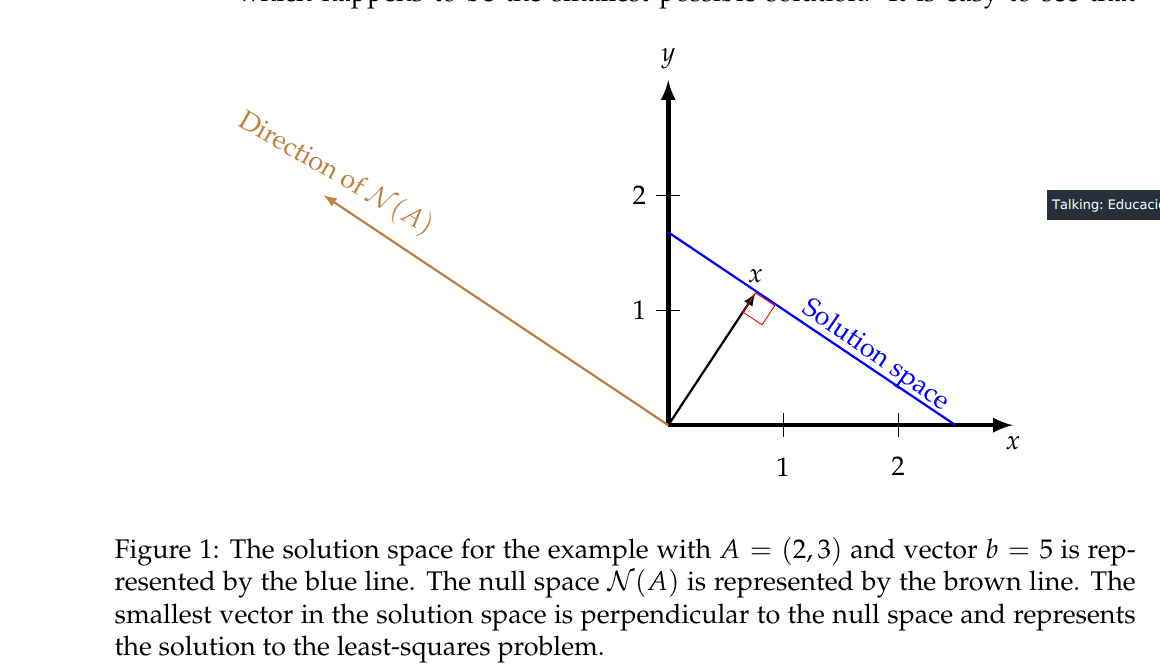

$$ 2 x + 3 y = 5$$ esto es lo mismo que

$$ (2 \quad 3) \begin{pmatrix} x \\ y \end{pmatrix} = 5$$.

Se puede probar (geometria analitica) que la solucion es:

$$ x = \begin{pmatrix} 0.76923 \\ 1.15385 \end{pmatrix} $$

La pseudoinversa es aquella matriz $A^+$ tal que
$$ x = A^+ b $$. Tarea: encuentrela. 


Tarea: encontrar la pseudo-solucion $x$ y con esto hallar
la pseudo-inversa $A^+$. 


* Si $b \notin \mathcal{R}(A)$, entonces el sistema $Ax=b$ no tiene solucion. La solucion es proyectar $b$ al rango de $A$. Probamos en las notas de clase (Jaramillo & Rueger) que esto es lo mismo que resolver
$$ A^* A x = A^* b$ (las ecuaciones normales). Que podria pasar:
    * Si $\mathcal{N} = \{ 0 \}$. En este caso $A^* A$ tiene inversa (la tarea) y 

    $$ x = (A^* A)^{-1} A^* b $$.
    La pseudoinversa es $A^+ = (A^* A)^{-1} A^*$.

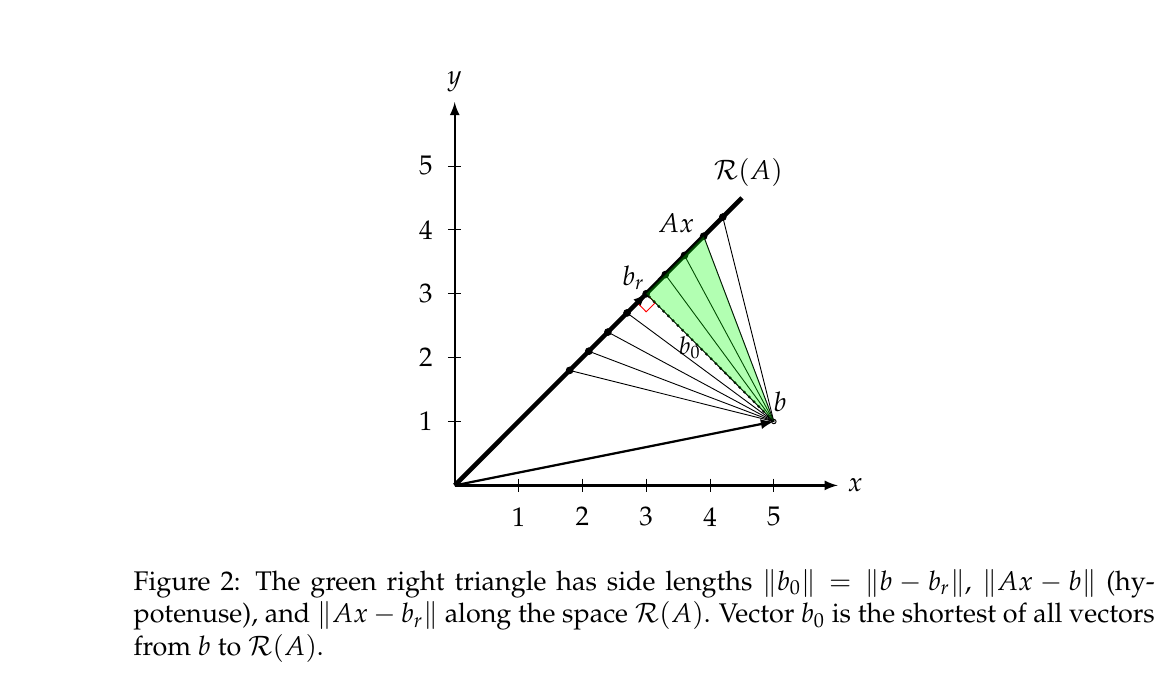


    * Que pasa si $\mathcal{N} \ne \{ 0 \}$. Aca hacemoss Tikhnov regularization. 

    $$ x = (A^T A + \lambda I)^{-1} A^T b $$.
    la pseudoinversa es

    $$ A^+ = \lim_{\lambda \to 0} (A^T A + \lambda I)^{-1} A^T$$

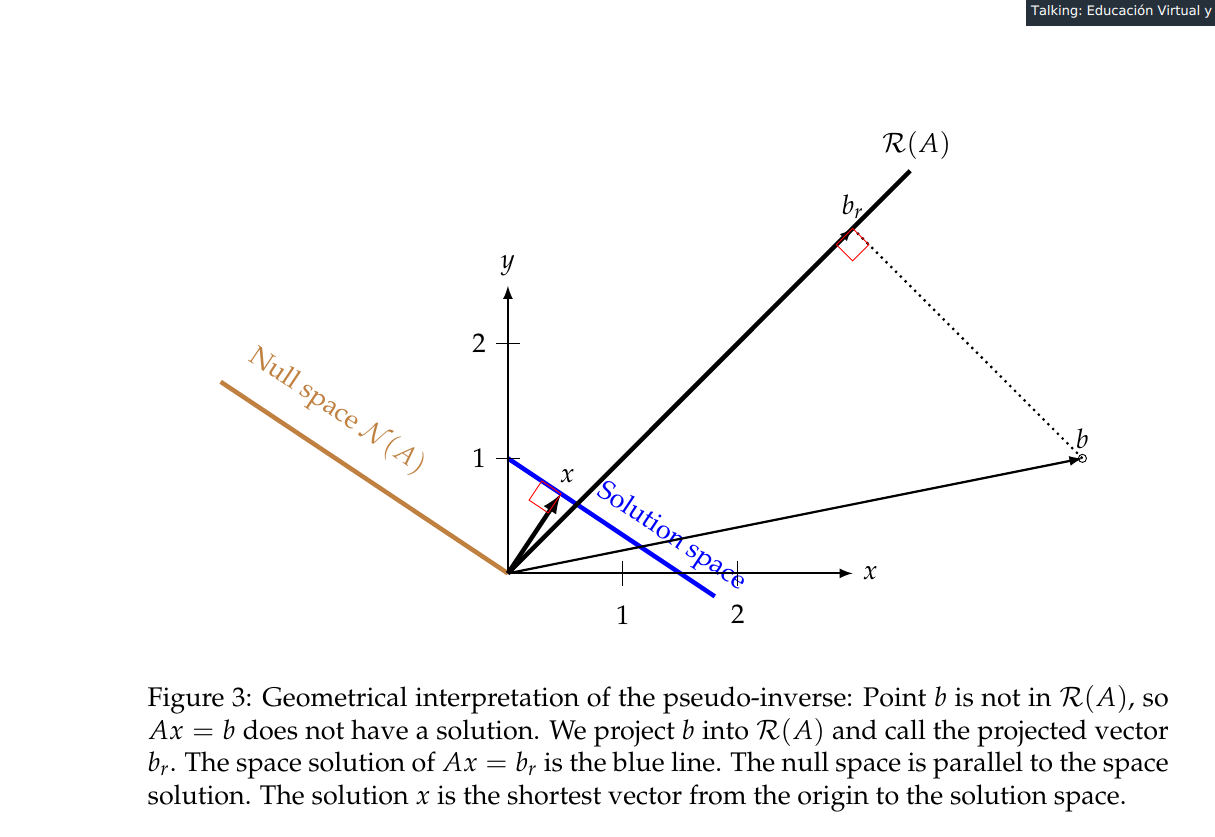

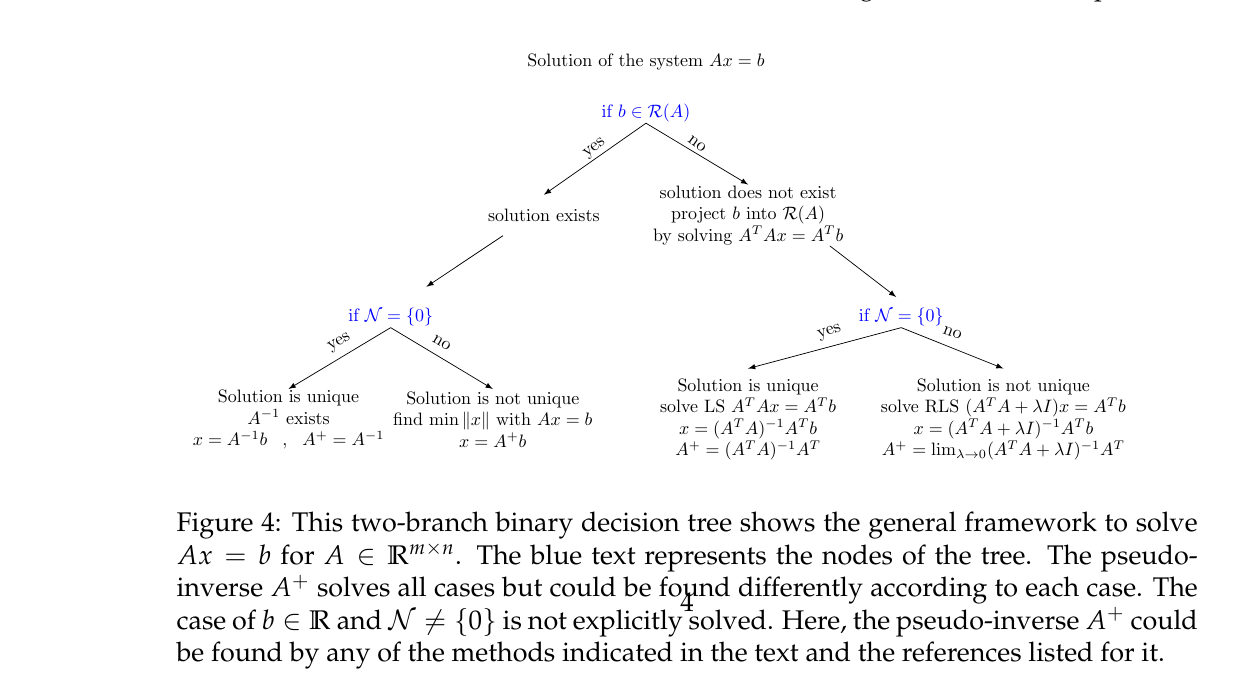

## Como hallar la pseudoinversa en general. 

Keener (James P. Keener, Applied Math) muestra, por lo menos, 4 metodos para hallar la pseudoinversa. Aca solo estudiamos uno usando SVD.

Recuerde que para cualquier matriz $A$,

$$A = U \Sigma V^* $$
donde $\Sigma$ es diagonal con los valores singulares (raices cuadradas de los autovalores de $A^*A$ o $A A^*$) son positivos o 0. $U$ es una matriz ortogonal cuyas columnas son autovectores de $A A^*$ y $V$ es otra matriz ortogonal cuyas columnas son autovectores de $A^* A$.

Donde

$$ \Sigma =  \begin{pmatrix} \Sigma_r & | & 0  \\
-- & & -- \\ 
0 & | & 0  \end{pmatrix} $$ .

Quisieramos que la invesa fuera:

$$ A^{-1} = V \Sigma^{-1} U^*  $$
El problema aca es que $\Sigma^{-1}$ no siempre existe. Vasta un $\sigma_i=0$ para que la inversa no exista. 

La siguiente matriz arregla el problema:

$$\Sigma^+ = \begin{pmatrix} \Sigma_r^{-1} & | & 0  \\
-- & & -- \\ 
0 & | & 0  \end{pmatrix}  $$

Se puede probar (Jaramillo & Rueger, Keener) que

$$ A^+ = V \Sigma^+ U^* $$.

Dos noticias buenas:

* El SVD funciona para **TODAS** las matrices
* La pseudoinveresa existe para **TODAS** matrices 

Una noticia mala $A^{-1}$ existe para **muy poquitas** matrices. 

Analisis dimenesional:

$A$ es $m \times n$, $V$ es $n \times n$, $\Sigma$ es $m \times n$,
$\Sigma^+$ es $n \times m$, $U^*$ es $m \times m$.

Entonces:

$A^+$ es:

$$ (n \times n) \times (n \times m) \times (m \times m) \implies (n \times m) $$

La pseudoinversa de $(2 \quad 3)$ es 
$$ \begin{pmatrix} x \\ y \end{pmatrix} $$ 

En forma explita:

\begin{eqnarray}
\Sigma^+ = \begin{pmatrix}
\sigma_1^{-1} & 0 & \cdots & \cdots & \cdots & \cdots & 0 \\
0 & \sigma_2^{_1} & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots  \\
\vdots & \ddots & \ddots  & \sigma_r^{-1} &\ddots  & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots  \\
0 & \cdots & \cdots & \cdots & \cdots & \cdots & 0 
\end{pmatrix} 
\end{eqnarray}